In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Podaj ścieżkę do pliku CSV
file_path = "fft_rgb.csv"

# Wczytaj plik CSV do DataFrame
df = pd.read_csv(file_path)

# Wyświetl pierwsze 5 wierszy DataFrame
df.head()

,AUC,Precision,Recall,TN,TP,accuracy,loss,val_AUC,val_Precision,val_Recall,val_TN,val_TP,val_accuracy,val_loss
0,0.490591,0.358209,0.006946,4953.0,24.0,0.588924,0.681185,0.554212,0.000000,0.000000,2495.0,0.0,0.599327,0.673619
1,0.528682,0.000000,0.000000,4996.0,0.0,0.591173,0.676376,0.535736,0.000000,0.000000,2495.0,0.0,0.599327,0.676895
2,0.553926,0.636364,0.002026,4992.0,7.0,0.591528,0.671736,0.574161,0.500000,0.001799,2492.0,3.0,0.599327,0.668369
3,0.596190,0.538462,0.024313,4924.0,84.0,0.592593,0.662152,0.590617,0.527273,0.017386,2469.0,29.0,0.600048,0.665593
4,0.630719,0.566866,0.082200,4779.0,284.0,0.599101,0.649265,0.613163,0.508021,0.113909,2311.0,190.0,0.600769,0.660326


In [48]:
max_values = df.max()
max_values

AUC                 0.970794
Precision           0.842588
Recall              0.957453
TN               4996.000000
TP               3308.000000
accuracy            0.909478
loss                0.681185
val_AUC             0.912086
val_Precision       0.789474
val_Recall          0.956835
val_TN           2495.000000
val_TP           1596.000000
val_accuracy        0.861878
val_loss            0.676895
dtype: float64

In [49]:
min = df['val_loss'].idxmin()
df.loc[min]

AUC                 0.963982
Precision           0.826590
Recall              0.951954
TN               4306.000000
TP               3289.000000
accuracy            0.898710
loss                0.228444
val_AUC             0.912086
val_Precision       0.776429
val_Recall          0.920264
val_TN           2053.000000
val_TP           1535.000000
val_accuracy        0.861878
val_loss            0.359897
Name: 17, dtype: float64

In [50]:
df.columns = [
    'auc_trening', 'Precyzja Trening', 'Czułość Trening',
    'tn_trening', 'tp_trening', 'Dokładność Trening', 'Strata Trening',
    'auc_test', 'Precyzja Test', 'Czułość Test',
    'tn_test', 'tp_test', 'Dokładność Test', 'Strata Test'
]
df.head()

,auc_trening,Precyzja Trening,Czułość Trening,tn_trening,tp_trening,Dokładność Trening,Strata Trening,auc_test,Precyzja Test,Czułość Test,tn_test,tp_test,Dokładność Test,Strata Test
0,0.490591,0.358209,0.006946,4953.0,24.0,0.588924,0.681185,0.554212,0.000000,0.000000,2495.0,0.0,0.599327,0.673619
1,0.528682,0.000000,0.000000,4996.0,0.0,0.591173,0.676376,0.535736,0.000000,0.000000,2495.0,0.0,0.599327,0.676895
2,0.553926,0.636364,0.002026,4992.0,7.0,0.591528,0.671736,0.574161,0.500000,0.001799,2492.0,3.0,0.599327,0.668369
3,0.596190,0.538462,0.024313,4924.0,84.0,0.592593,0.662152,0.590617,0.527273,0.017386,2469.0,29.0,0.600048,0.665593
4,0.630719,0.566866,0.082200,4779.0,284.0,0.599101,0.649265,0.613163,0.508021,0.113909,2311.0,190.0,0.600769,0.660326


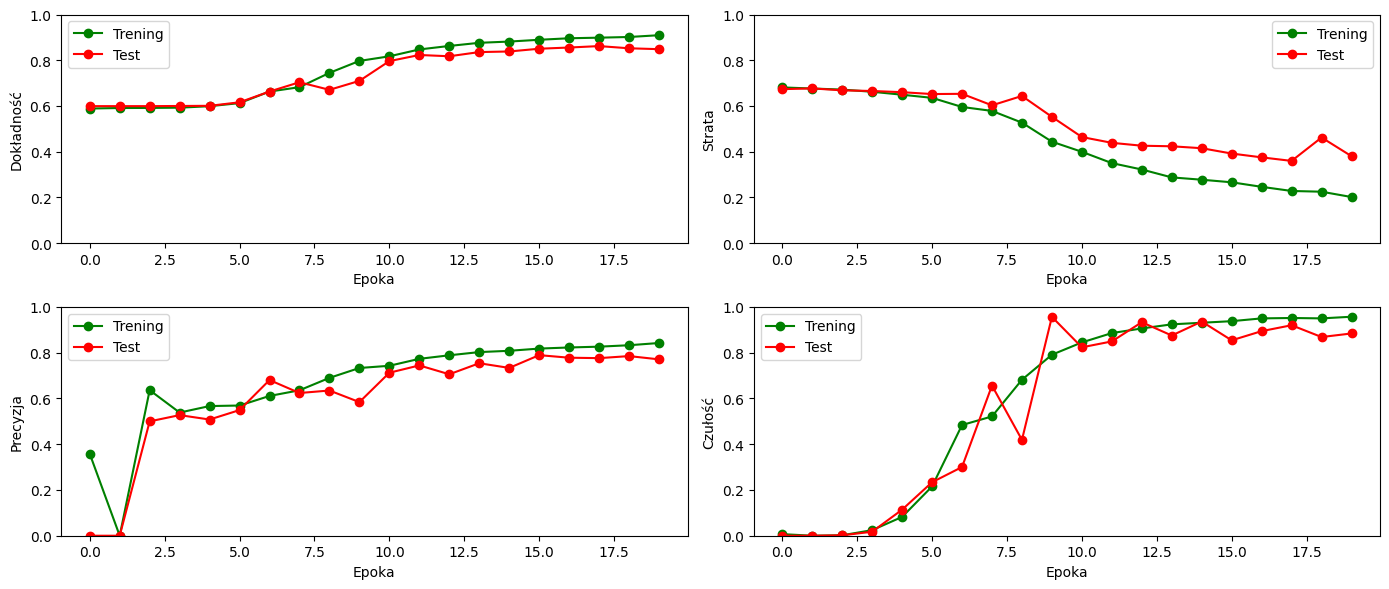

Training history with confidence intervals saved as training_history_with_ci.svg


In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Wykres dla Dokładności
axes[0, 0].plot(df['Dokładność Trening'], label='Trening', color='green', marker='o')
axes[0, 0].plot(df['Dokładność Test'], label='Test', color='red', marker='o')
axes[0, 0].set_xlabel('Epoka')
axes[0, 0].set_ylabel('Dokładność')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].legend()

# Wykres dla Straty
axes[0, 1].plot(df['Strata Trening'], label='Trening', color='green', marker='o')
axes[0, 1].plot(df['Strata Test'], label='Test', color='red', marker='o')
axes[0, 1].set_xlabel('Epoka')
axes[0, 1].set_ylabel('Strata')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend()

# Wykres dla Precyzji
axes[1, 0].plot(df['Precyzja Trening'], label='Trening', color='green', marker='o')
axes[1, 0].plot(df['Precyzja Test'], label='Test', color='red', marker='o')
axes[1, 0].set_xlabel('Epoka')
axes[1, 0].set_ylabel('Precyzja')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend()

# Wykres dla Czułości
axes[1, 1].plot(df['Czułość Trening'], label='Trening', color='green', marker='o')
axes[1, 1].plot(df['Czułość Test'], label='Test', color='red', marker='o')
axes[1, 1].set_xlabel('Epoka')
axes[1, 1].set_ylabel('Czułość')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].legend()

# Zapis do pliku SVG

plt.tight_layout()
plt.savefig('training_fft_rgb.svg', format='svg')
plt.show()

print("Training history with confidence intervals saved as training_history_with_ci.svg")
